# DataGym
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:
df_descr = pd.read_csv('otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не знаем)

In [4]:
df_train = pd.read_csv('otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train['sample'] = 'train'
df_test['sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns:                      # перебираем все столбцы
    if str(df_train[i].dtype) == 'object':      # если тип столбца - object
        print('='*10)
        print(i)                                # выводим название столбца
        print(set(df_train[i]))                 # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n')                             # выводим пустую строку

EDUCATION
{'Высшее', 'Неоконченное высшее', 'Два и более высших образования', 'Неполное среднее', 'Среднее', 'Среднее специальное', 'Ученая степень'}


MARITAL_STATUS
{'Гражданский брак', 'Разведен(а)', 'Не состоял в браке', 'Состою в браке', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'Банк/Финансы', 'Недвижимость', 'Сельское хозяйство', 'Наука', 'Энергетика', 'Нефтегазовая промышленность', 'Страхование', 'Информационные технологии', 'Металлургия/Промышленность/Машиностроение', 'Другие сферы', 'Торговля', 'Образование', 'Туризм', 'Коммунальное хоз-во/Дорожные службы', 'СМИ/Реклама/PR-агенства', 'Химия/Парфюмерия/Фармацевтика', 'Маркетинг', 'Строительство', 'Управляющая компания', 'Подбор персонала', 'Государственная служба', 'Ресторанный бизнес/Общественное питание', 'Юридические услуги/нотариальные услуги', 'ЧОП/Детективная д-ть', 'Развлечения/Искусство', 'Транспорт', 'Логистика', 'Здравоохранение', 'Салоны красоты и здоровья', 'Информационные услуги', 'Сборочные производства'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [15]:
df['CREDIT'] = df['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
df['FST_PAYMENT'] = df['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
df['LOAN_AVG_DLQ_AMT'] = df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
df['LOAN_MAX_DLQ_AMT'] = df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PR

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

In [17]:
# Получим списки названий категориальных фичей и числовые
categorial_columns = []
numeric_columns = []
for i in df.columns:                      
    if str(df[i].dtype) == 'object':      
        categorial_columns.append(str(i))  
    else:
        numeric_columns.append(str(i))

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Заполните их нулями

In [18]:
df.isnull().sum() #сколько пропусков в каждом столбце

AGREEMENT_RK                      0
TARGET                            0
AGE                               0
SOCSTATUS_WORK_FL                 0
SOCSTATUS_PENS_FL                 0
GENDER                            0
CHILD_TOTAL                       0
DEPENDANTS                        0
EDUCATION                         0
MARITAL_STATUS                    0
GEN_INDUSTRY                   2713
GEN_TITLE                      2713
ORG_TP_STATE                   2713
ORG_TP_FCAPITAL                2708
JOB_DIR                        2713
FAMILY_INCOME                     0
PERSONAL_INCOME                   0
REG_ADDRESS_PROVINCE              0
FACT_ADDRESS_PROVINCE             0
POSTAL_ADDRESS_PROVINCE           0
TP_PROVINCE                     590
REGION_NM                         2
REG_FACT_FL                       0
FACT_POST_FL                      0
REG_POST_FL                       0
REG_FACT_POST_FL                  0
REG_FACT_POST_TP_FL               0
FL_PRESENCE_FL              

In [19]:
df.loc[55:59, 'GEN_INDUSTRY':'JOB_DIR'] # имеются NaN

,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR
55,Другие сферы,Руководитель высшего звена,Частная компания,Без участия,"Бухгалтерия, финансы, планир."
56,ЧОП/Детективная д-ть,Служащий,Частная компания,Без участия,Участие в основ. деятельности
57,NaN,NaN,NaN,NaN,NaN
58,Государственная служба,Служащий,Государственная комп./учреж.,Без участия,Участие в основ. деятельности
59,Торговля,Специалист,Частная компания,Без участия,Участие в основ. деятельности


In [20]:
df[list(('TP_PROVINCE', 'WORK_TIME', 'PREVIOUS_CARD_NUM_UTILIZED'))].head(10)

,TP_PROVINCE,WORK_TIME,PREVIOUS_CARD_NUM_UTILIZED
0,Красноярский край,39.0,NaN
1,Орловская область,NaN,NaN
2,Коми,156.0,NaN
3,Читинская область,9.0,NaN
4,Хабаровский край,84.0,NaN
5,Кировская область,NaN,NaN
6,Курганская область,444.0,NaN
7,Томская область,144.0,NaN
8,Омская область,NaN,NaN
9,Оренбургская область,36.0,NaN


Заменяем в наших данных все пропуски категориальных признаков на **'my_uniq_na'**.

А пропуски в вещественных признаках на нули.

In [21]:
df[numeric_columns] = df[numeric_columns].fillna(0)
df[categorial_columns] = df[categorial_columns].fillna('my_uniq_na')

In [22]:
df.loc[55:59, 'GEN_INDUSTRY':'JOB_DIR']

,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR
55,Другие сферы,Руководитель высшего звена,Частная компания,Без участия,"Бухгалтерия, финансы, планир."
56,ЧОП/Детективная д-ть,Служащий,Частная компания,Без участия,Участие в основ. деятельности
57,my_uniq_na,my_uniq_na,my_uniq_na,my_uniq_na,my_uniq_na
58,Государственная служба,Служащий,Государственная комп./учреж.,Без участия,Участие в основ. деятельности
59,Торговля,Специалист,Частная компания,Без участия,Участие в основ. деятельности


In [23]:
df[list(('TP_PROVINCE', 'WORK_TIME', 'PREVIOUS_CARD_NUM_UTILIZED'))].head(10)

,TP_PROVINCE,WORK_TIME,PREVIOUS_CARD_NUM_UTILIZED
0,Красноярский край,39.0,0.0
1,Орловская область,0.0,0.0
2,Коми,156.0,0.0
3,Читинская область,9.0,0.0
4,Хабаровский край,84.0,0.0
5,Кировская область,0.0,0.0
6,Курганская область,444.0,0.0
7,Томская область,144.0,0.0
8,Омская область,0.0,0.0
9,Оренбургская область,36.0,0.0


всё получилось :)

#### Задание 2. В данных есть признаки, которые можно назвать категориальным, например семейный статус
 {'Состою в браке', 'Разведен(а)', 'Не состоял в браке', 'Вдовец/Вдова', 'Гражданский брак'}
 и таких много
#### Закодируйте их числами (например идентификаторами 1, 2, 3, ... )
#### Можно иначе, если есть идеи как.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  30133 non-null object
GEN_TITLE                     30133 non-null object
ORG_TP_STATE                  30133 non-null object
ORG_TP_FCAPITAL               30133 non-null object
JOB_DIR                       30133 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PR

# One-hot encoding:

Получим таблицу данных из категориальных признаков, но в вещественном представлении:

In [25]:
one_hot = pd.get_dummies(df[categorial_columns])
one_hot #аж 414 признаков вышло (было 14)

,EDUCATION_Высшее,EDUCATION_Два и более высших образования,EDUCATION_Неоконченное высшее,EDUCATION_Неполное среднее,EDUCATION_Среднее,EDUCATION_Среднее специальное,EDUCATION_Ученая степень,MARITAL_STATUS_Вдовец/Вдова,MARITAL_STATUS_Гражданский брак,MARITAL_STATUS_Не состоял в браке,...,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_СЕВЕРО-ЗАПАДНЫЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ,sample_test,sample_train
0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30128,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
30129,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
30130,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
30131,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


Удаляем из наших данных изначальные категориальные признаки и добавляем новые бинарные признаки:

In [26]:
df = df.drop(categorial_columns,axis = 1)
df = df.join(one_hot)
df

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,...,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_СЕВЕРО-ЗАПАДНЫЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ,sample_test,sample_train
0,59909969,0,30,1,0,1,1,1,7000.0,0,...,0,0,0,0,0,0,0,0,1,0
1,59910420,0,48,0,1,1,0,0,4100.0,1,...,0,0,0,0,1,0,0,0,1,0
2,59911223,0,35,1,0,0,1,0,40000.0,1,...,0,0,0,0,0,1,0,0,1,0
3,59911322,0,22,1,0,0,0,0,20000.0,1,...,0,0,0,0,0,0,0,0,1,0
4,59911438,0,27,1,0,1,2,2,17000.0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30128,75291424,0,25,1,0,0,1,1,12000.0,0,...,0,0,0,0,0,1,0,0,0,1
30129,75291888,0,51,1,0,1,2,0,10000.0,1,...,0,0,0,1,0,0,0,0,0,1
30130,75291923,0,22,1,0,1,1,1,6000.0,1,...,0,0,0,0,1,0,0,0,0,1
30131,75291960,0,60,0,1,1,2,0,4500.0,1,...,0,0,0,0,0,0,0,0,0,1


In [27]:
df.info() # всего 453 признака в итоговой таблице, 414 бинарных/категориальных и 39 вещественных 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 453 entries, AGREEMENT_RK to sample_train
dtypes: float64(7), int64(32), uint8(414)
memory usage: 20.9 MB


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками (см задание 1)
* Кодировала категориальные признаки (см задание 2) Если закодировать признаки вам не удалось - удалите все что не числа

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [28]:
# def preproc_data(df_input):
#    df_output = df_input.copy()   
#    return df_output

In [29]:
#удаляем идентификатор AGREEMENT_RK
df = df.drop('AGREEMENT_RK',axis = 1) 

In [30]:
#df_preproc = df.pipe(preproc_data) # применит вашу написанную выше функцию к датафрейму и вернут новый

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 452 entries, TARGET to sample_train
dtypes: float64(7), int64(31), uint8(414)
memory usage: 20.6 MB


Функцию не написал, так как до этого провёл предобработку

Датафрейм содержит только числа и не имеет пропусков

30133 строк, 452 столбцов

#### Задание 4. Выше мы собрали данные в один датафрейм и записали столбец sample, чтоб было видно где что осталось.
#### ... напишите код, который разделит df_preproc на 2 части train и test (записав в df_train_preproc и df_test_preproc соответственно)
#### ... удалив колонку sample

Удалим колонку **'sample_test'**, так как у нас есть столбец **'sample_train'**; если он равен единице, то строка **train**, если он равен 0, то строка **test**

In [32]:
df = df.drop('sample_test',axis = 1)  

In [33]:
df_train_preproc = df[df['sample_train'] == 1]
df_test_preproc = df[df['sample_train'] == 0]

Удаляем столбец **sample_train**:

In [34]:
df_train_preproc = df_train_preproc.drop('sample_train',axis = 1)  
df_test_preproc = df_test_preproc.drop('sample_train',axis = 1)  

#### Задание 5. Отделите целевую переменную и остальные признаки (речь не про train_test_split)
Выше у вас получились матрицы df_train_preproc и df_test_preproc

Должно получится:
* 2 матрицы: X и X_valid
* 2 вектора: y и y_valid


* где X - все данные df_train_preproc, кроме TARGET
* где X_valid - все данные df_test_preproc, кроме TARGET
* где y - TARGET от df_train_preproc
* где y_valid - TARGET от df_test_preproc

In [35]:
y = df_train_preproc['TARGET']
y_valid = df_test_preproc['TARGET']

In [36]:
X = df_train_preproc.drop('TARGET',axis = 1) 
X_valid = df_test_preproc.drop('TARGET',axis = 1) 

#### Задание 6. Обучение и оценка качества разных моделей

In [37]:
# Поделите данные X и y на 2 части (train и test, размером от исходного 70% и 30% соответственно)

from sklearn.model_selection import train_test_split

(X_train, X_test,
 y_train, y_test) = train_test_split(X, y, 
                                     test_size=0.3, 
                                     random_state=0)


In [38]:
# Попробовать следующие "черные ящики": интерфейс у всех одинаковый 
# Постепенно мы узнаем, что они делаютб а сейчас учимся выбирать какой работает качественнее
#     fit, 
#     predict
# записав предсказания в pred_1, pred_2, pred_3

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)
pred1 = clf1.predict(X_test)

clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)
pred2 = clf2.predict(X_test)

clf3 = LogisticRegression()
clf3.fit(X_train, y_train)
pred3 = clf3.predict(X_test)

## Your Code Here

/home/jupyter/jupyter/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/jupyter/jupyter/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
# Посчитать метрики стандартные
# accuracy, precision, recall, а1
# в pred_1, pred_2, pred_3 у вас должны лежать предсказания разных "ящиков"
# посчитайте метрики для каждого

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_score1 = accuracy_score(y_test, pred1)
precision_score1 = precision_score(y_test, pred1)
recall_score1 = recall_score(y_test, pred1)
f1_score1 = f1_score(y_test, pred1)

accuracy_score2 = accuracy_score(y_test, pred2)
precision_score2 = precision_score(y_test, pred2)
recall_score2 = recall_score(y_test, pred2)
f1_score2 = f1_score(y_test, pred2)

accuracy_score3 = accuracy_score(y_test, pred3)
precision_score3 = precision_score(y_test, pred3)
recall_score3 = recall_score(y_test, pred3)
f1_score3 = f1_score(y_test, pred3)

In [40]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить  качество)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

s1 = [accuracy_score1, precision_score1, recall_score1, f1_score1]
s2 = [accuracy_score2, precision_score2, recall_score2, f1_score2]
s3 = [accuracy_score3, precision_score3, recall_score3, f1_score3]
x = np.arange(len(s1))  
width = 0.2 

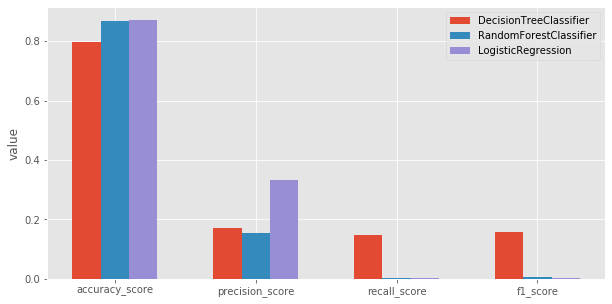

In [41]:
fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width, s1, width, label='DecisionTreeClassifier')
rects2 = ax.bar(x, s2, width, label='RandomForestClassifier')
rects3 = ax.bar(x + width, s3, width, label='LogisticRegression')

ax.set_ylabel('value')
ax.set_xticks(x)
ax.set_xticklabels(('accuracy_score', 'precision_score', 'recall_score', 'f1_score'))
ax.legend()

#### Задание 7. Заключительное.
#### Выше вы можете выборать самую лучшую модель "коробочку" по метрике F1
#### Теперь вы знаете какой тип коробочки из представленных лучше всего работает на данной задаче
#### Пора: 1) заново объявить эту коробочку
#### 2) обучить на всем X,y
#### 3) протестировать на отложенном X_valid, y_valid

In [42]:
# Взять лучшую модель и сделать предсказания для X_valid выборки
# Лучшая модель 'DecisionTreeClassifier'
tree = DecisionTreeClassifier()
tree.fit(X, y)
pred_final = tree.predict(X_valid)

In [43]:
# Посчитать метрики на полученном предсказании
accuracy_score_tree = accuracy_score(y_valid, pred_final)
precision_score_tree = precision_score(y_valid, pred_final)
recall_score_tree = recall_score(y_valid, pred_final)
f1_score_tree = f1_score(y_valid, pred_final)

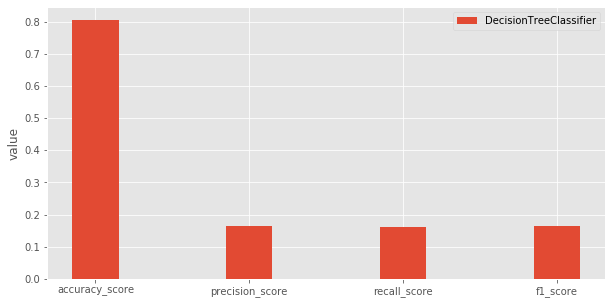

In [44]:
s = [accuracy_score_tree, precision_score_tree, recall_score_tree, f1_score_tree]
x = np.arange(len(s))  
width = 0.3 
fig, ax = plt.subplots(figsize=(10,5))
rects = ax.bar(x, s, width, label='DecisionTreeClassifier')

ax.set_ylabel('value')
ax.set_xticks(x)
ax.set_xticklabels(('accuracy_score', 'precision_score', 'recall_score', 'f1_score'))
ax.legend()

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который мы посмотрим и в случае чего откомментируем. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [45]:
### И далее ;)